In [ ]:

from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Input, LeakyReLU
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

from keras.models import Model
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave

import numpy as np
import tensorflow as tf

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 00440001.AVI	      'Copia di Basic Image Processing_Grana.pptx'   good_todo
'Bad_complete video'   CV_Morandi_Sara.pdf			    'My Drive'
 Bad_todo	       CV_SaraMorandi.doc			     Università
 Black_and_white       Dataset					     videos
'Colab Notebooks'      File_000.jpeg
 contacts.vcf	      'Good_complete video'


In [ ]:
path = '/mydrive/Black_and_white'

train_datagen = ImageDataGenerator(rescale = 1. /255)



In [ ]:
train = train_datagen.flow_from_directory(path,
                                          target_size = (256,256),
                                          batch_size = 340,
                                          class_mode =None
    
)

Found 1247 images belonging to 1 classes.


In [ ]:
X = []
Y = []

for img in train[0]:
  try:
    lab = rgb2lab(img)
    X.append(lab[:,:,0])
    Y.append(lab[:,:,1:]/128)
  except:
    print('error')

In [ ]:
X = np.array(X)
Y = np.array(Y)

X = X.reshape(X.shape+(1,))

print(X.shape)

(340, 256, 256, 1)


In [ ]:

#encoder

model = Sequential()
model.add(Conv2D(64,(3,3), activation='relu',padding = 'same', strides=2, input_shape=(256,256,1)))
model.add(Conv2D(128,(3,3), activation='relu',padding='same'))
model.add(Conv2D(128,(3,3), activation='relu',padding='same', strides = 2))
model.add(Conv2D(256,(3,3), activation='relu',padding='same'))
model.add(Conv2D(256,(3,3), activation='relu',padding='same', strides = 2))
model.add(Conv2D(512,(3,3), activation='relu',padding='same'))
model.add(Conv2D(512,(3,3), activation='relu',padding='same'))
model.add(Conv2D(256,(3,3), activation='relu',padding='same'))

In [ ]:
#decoder

model.add(Conv2D(128,(3,3), activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3), activation='relu',padding='same'))
model.add(Conv2D(16,(3,3), activation='relu',padding='same'))
model.add(Conv2D(2,(3,3), activation='tanh',padding='same'))
model.add(UpSampling2D((2,2)))
model.compile(optimizer='adam', loss='mse',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 512)       2

In [ ]:
model.fit(X,Y,validation_split=0.1,epochs=50,batch_size=16)

Epoch 1/50
20/20 [==============================] - 19s 234ms/step - loss: 0.0568 - accuracy: 0.5046 - val_loss: 0.0231 - val_accuracy: 0.5020
Epoch 2/50
20/20 [==============================] - 3s 152ms/step - loss: 0.0167 - accuracy: 0.5048 - val_loss: 0.0191 - val_accuracy: 0.5160
Epoch 3/50
20/20 [==============================] - 3s 151ms/step - loss: 0.0163 - accuracy: 0.5138 - val_loss: 0.0192 - val_accuracy: 0.4862
Epoch 4/50
20/20 [==============================] - 3s 151ms/step - loss: 0.0162 - accuracy: 0.5481 - val_loss: 0.0187 - val_accuracy: 0.6016
Epoch 5/50
20/20 [==============================] - 3s 152ms/step - loss: 0.0159 - accuracy: 0.5569 - val_loss: 0.0185 - val_accuracy: 0.5777
Epoch 6/50
20/20 [==============================] - 3s 152ms/step - loss: 0.0159 - accuracy: 0.5515 - val_loss: 0.0186 - val_accuracy: 0.5403
Epoch 7/50
20/20 [==============================] - 3s 152ms/step - loss: 0.0156 - accuracy: 0.5715 - val_loss: 0.0183 - val_accuracy: 0.5571
Epoch

In [ ]:
img1_color= []

In [ ]:
img1 = img_to_array(load_img('/content/00000125_(5).jpg'))
img1 = resize(img1,(256,256))
img1_color.append(img1)



In [ ]:
img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))


In [ ]:
output1= model.predict(img1_color)
output1 = output1 * 128


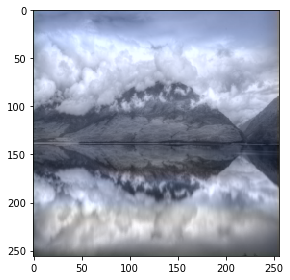

In [ ]:
from skimage.io import imread, imshow

result = np.zeros((256,256,3))
result[:,:,0]= img1_color[0][:,:,0]
result[:,:,1:]= output1[0]
imshow(lab2rgb(result))
imsave("result2.png",lab2rgb(result))